## Import Libraries

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load DataSet

In [110]:
df = pd.read_csv("CSV_Files/track OL vs WCh.csv")

In [111]:
df.head(6)

,Where,Year,Event,Distance,Sex,Rank,Lane,Athlete,Nation,Time,Notes,Wind m/s
0,Olympics,2021,Run,100,M,1,3.0,Marcell Jacobs,�Italy,9.8,AR,0.0
1,Olympics,2021,Run,100,M,2,5.0,Fred Kerley,�United States,9.84,PB,0.0
2,Olympics,2021,Run,100,M,3,9.0,Andre De Grasse,�Canada,9.89,PB,0.0
3,Olympics,2021,Run,100,M,4,2.0,Akani Simbine,�South Africa,9.93,NaN,0.0
4,Olympics,2021,Run,100,M,5,7.0,Ronnie Baker,�United States,9.95,NaN,0.0
5,Olympics,2021,Run,100,M,6,6.0,Su Bingtian,�China,9.98,NaN,0.0


## Drop Useless Columns

In [113]:
df.drop('Athlete', inplace=True, axis=1)
df.drop('Nation', inplace=True, axis=1)

## View first and last 6 values

In [114]:
df.head(6)

,Where,Year,Event,Distance,Sex,Rank,Lane,Time,Notes,Wind m/s
0,Olympics,2021,Run,100,M,1,3.0,9.8,AR,0.0
1,Olympics,2021,Run,100,M,2,5.0,9.84,PB,0.0
2,Olympics,2021,Run,100,M,3,9.0,9.89,PB,0.0
3,Olympics,2021,Run,100,M,4,2.0,9.93,NaN,0.0
4,Olympics,2021,Run,100,M,5,7.0,9.95,NaN,0.0
5,Olympics,2021,Run,100,M,6,6.0,9.98,NaN,0.0


In [115]:
df.tail(6)

,Where,Year,Event,Distance,Sex,Rank,Lane,Time,Notes,Wind m/s
450,World Championship,2019,Hurdles,400,F,3,5.0,53.74,PB,0.0
451,World Championship,2019,Hurdles,400,F,4,9.0,54.06,NR,0.0
452,World Championship,2019,Hurdles,400,F,5,8.0,54.23,NaN,0.0
453,World Championship,2019,Hurdles,400,F,6,2.0,54.45,NaN,0.0
454,World Championship,2019,Hurdles,400,F,7,3.0,54.45,SB,0.0
455,World Championship,2019,Hurdles,400,F,8,7.0,54.82,NaN,0.0


## View Sum of null values

In [116]:
df.isnull().sum()

Where         0
Year          0
Event         0
Distance      0
Sex           0
Rank         14
Lane        255
Time          4
Notes       276
Wind m/s      0
dtype: int64

In [117]:
df.shape

(456, 10)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Where     456 non-null    object 
 1   Year      456 non-null    int64  
 2   Event     456 non-null    object 
 3   Distance  456 non-null    int64  
 4   Sex       456 non-null    object 
 5   Rank      442 non-null    object 
 6   Lane      201 non-null    float64
 7   Time      452 non-null    object 
 8   Notes     180 non-null    object 
 9   Wind m/s  456 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 35.8+ KB


<AxesSubplot:>

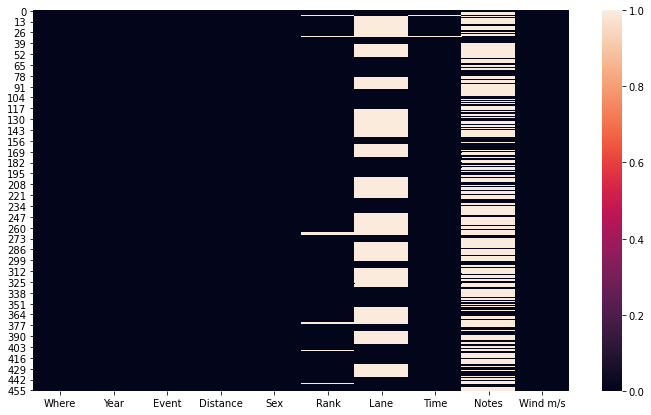

In [119]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull())

In [120]:
null_values = df.isnull().sum() /df.shape[0]*100
null_values

Where        0.000000
Year         0.000000
Event        0.000000
Distance     0.000000
Sex          0.000000
Rank         3.070175
Lane        55.921053
Time         0.877193
Notes       60.526316
Wind m/s     0.000000
dtype: float64

In [121]:
drop_columns = null_values[null_values > 17].keys()
drop_columns

Index(['Lane', 'Notes'], dtype='object')

In [122]:
df2_drop_columns = df.drop(columns = drop_columns)
df2_drop_columns.shape

(456, 8)

<AxesSubplot:>

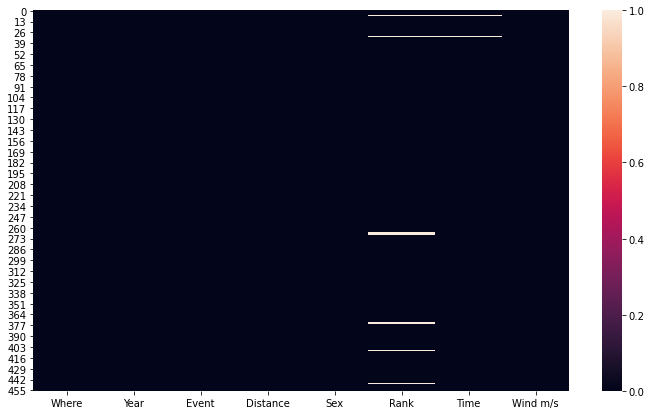

In [123]:
plt.figure(figsize=(12,7))
sns.heatmap(df2_drop_columns.isnull())

In [124]:
df3_drop_rows = df2_drop_columns.dropna()

In [125]:
df3_drop_rows.shape

(442, 8)

<AxesSubplot:>

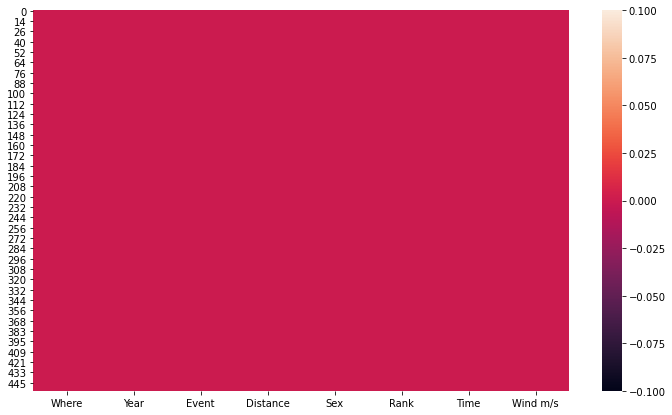

In [126]:
plt.figure(figsize=(12,7))
sns.heatmap(df3_drop_rows.isnull())

In [127]:
df3_drop_rows.isnull().sum().sum()

0

In [128]:
df3_drop_rows.select_dtypes(include=['int64','float64']).columns

Index(['Year', 'Distance', 'Wind m/s'], dtype='object')

In [129]:
df.shape

(456, 10)

In [130]:
df3_drop_rows.shape

(442, 8)

In [131]:
df3_drop_rows.head()

,Where,Year,Event,Distance,Sex,Rank,Time,Wind m/s
0,Olympics,2021,Run,100,M,1,9.8,0.0
1,Olympics,2021,Run,100,M,2,9.84,0.0
2,Olympics,2021,Run,100,M,3,9.89,0.0
3,Olympics,2021,Run,100,M,4,9.93,0.0
4,Olympics,2021,Run,100,M,5,9.95,0.0


In [132]:
for val in ['Where', 'Event', 'Sex']:
    print(f"Column Name: {val} \n {df3_drop_rows[val].value_counts()}\n\n")

Column Name: Where 
 Olympics              230
World Championship    212
Name: Where, dtype: int64


Column Name: Event 
 Run             287
Hurdles          95
Steeplechase     60
Name: Event, dtype: int64


Column Name: Sex 
 F    221
M    221
Name: Sex, dtype: int64




In [133]:
df3_drop_rows['Sex'] = df3_drop_rows['Sex'].map(dict(M=1, F=0))

<ipython-input-133-31ef7e892799>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_drop_rows['Sex'] = df3_drop_rows['Sex'].map(dict(M=1, F=0))


In [134]:
df3_drop_rows['Event'] = df3_drop_rows['Event'].map(dict(Run=0, Hurdles=1, Steeplechase=3))

<ipython-input-134-4adf389fc605>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_drop_rows['Event'] = df3_drop_rows['Event'].map(dict(Run=0, Hurdles=1, Steeplechase=3))


### If space in values then use this code

In [135]:
df3_drop_rows['Where'] = df3_drop_rows['Where'].replace("World Championship", "World_Championship", regex=True)

<ipython-input-135-2ab1a0daf75e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_drop_rows['Where'] = df3_drop_rows['Where'].replace("World Championship", "World_Championship", regex=True)


In [136]:
df3_drop_rows['Where'] = df3_drop_rows['Where'].map(dict(Olympics=0, World_Championship=1))

<ipython-input-136-1ea7884bb762>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_drop_rows['Where'] = df3_drop_rows['Where'].map(dict(Olympics=0, World_Championship=1))


In [137]:
df3_drop_rows.tail()

,Where,Year,Event,Distance,Sex,Rank,Time,Wind m/s
451,1,2019,1,400,0,4,54.06,0.0
452,1,2019,1,400,0,5,54.23,0.0
453,1,2019,1,400,0,6,54.45,0.0
454,1,2019,1,400,0,7,54.45,0.0
455,1,2019,1,400,0,8,54.82,0.0


In [138]:
df3_drop_rows.head()

,Where,Year,Event,Distance,Sex,Rank,Time,Wind m/s
0,0,2021,0,100,1,1,9.8,0.0
1,0,2021,0,100,1,2,9.84,0.0
2,0,2021,0,100,1,3,9.89,0.0
3,0,2021,0,100,1,4,9.93,0.0
4,0,2021,0,100,1,5,9.95,0.0


### Add mean values using fillna 

In [140]:
GFG_dict = { 'G1': [10, 20,30,40],
                'G2': [25, np.NaN, np.NaN, 29],
                'G3': [15, 14, 17, 11],
                'G4': [21, 22, 23, 25]}
  
# Create a DataFrame from dictionary
gfg = pd.DataFrame(GFG_dict)
  
#Finding the mean of the column having NaN
mean_value=gfg['G2'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
gfg['G2'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
gfg.head()

Updated Dataframe:


,G1,G2,G3,G4
0,10,25.0,15,21
1,20,27.0,14,22
2,30,27.0,17,23
3,40,29.0,11,25
